<a href="https://colab.research.google.com/github/ArianAmani/ML4Single-Cell-Workshop/blob/main/2_UnsupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Single-Cell Biology Workshop
## Arian Amani
Data Scientist | Wellcome Sanger Institute | Sapienza University of Rome
* [LinkedIn](https://www.linkedin.com/in/arianamani/)
* [GitHub](https://github.com/ArianAmani)
* [Website](https://arianamani.github.io/)


I'm using slides from the Machine Learning course at Sharif University of Technology (some of them made by me) as reference for the theoretical parts of the workshop.

Course Slides and Material for more information: [Github](https://github.com/SharifiZarchi/Introduction_to_Machine_Learning/tree/main/Previous_Semesters/1401_01)

## 5. Unsupervised Learning: Clustering
* K-Means
* Evaluating Clustering Results: Silhouette Score, Elbow Method
* **Exercise: Apply Clustering to a Single-Cell Dataset**

Once again, let's go to our slides to have a theoretical review of what we are going to see.

In [ ]:
!pip install scanpy
!pip install igraph
!pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import scanpy as sc

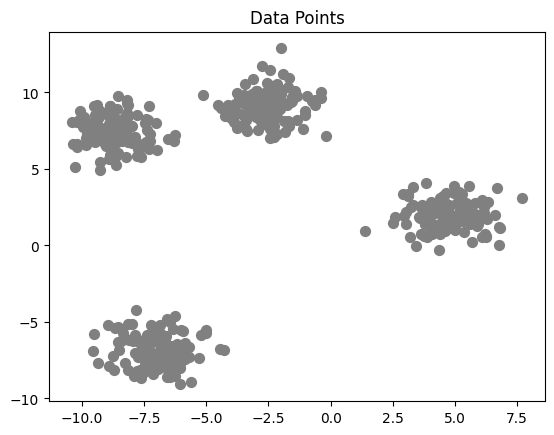

In [ ]:
X, _ = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1.0, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c='gray', s=50)
plt.title('Data Points')
plt.show()

In [ ]:
X.min(), X.max()

(-10.422230580121735, 12.867017618853042)

In [ ]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled.min(), X_scaled.max()

(-1.8942324943302213, 2.1074686970208902)

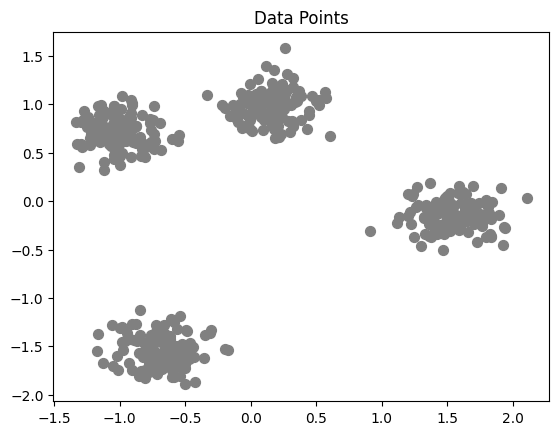

In [ ]:
#@title Visualizing the data
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='gray', s=50)
plt.title('Data Points')
plt.show()

In [ ]:
#@title K-Means Clustering
def plot_kmeans(n_clusters, data):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    y_kmeans = kmeans.fit_predict(data)

    plt.scatter(data[:, 0], data[:, 1], c=y_kmeans, s=50, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
    plt.title(f'K-Means Clustering with {n_clusters} Clusters')
    plt.show()
    return y_kmeans, kmeans

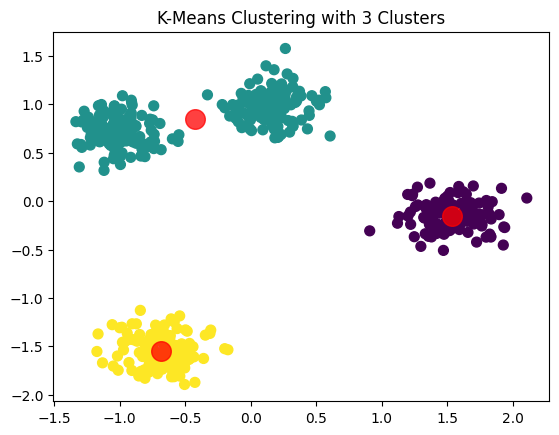

In [ ]:
#@title Using K-Means with 3 clusters (as an example)
y_kmeans, kmeans_model = plot_kmeans(3, X_scaled)

In [ ]:
#@title Elbow Method for Finding Optimal Number of Clusters
def elbow_method(data):
    sse = []
    cluster_range = range(1, 11)
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)  # Inertia: Sum of squared distances of samples to their closest cluster center

    plt.plot(cluster_range, sse, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE (Inertia)')
    plt.title('Elbow Method')
    plt.show()

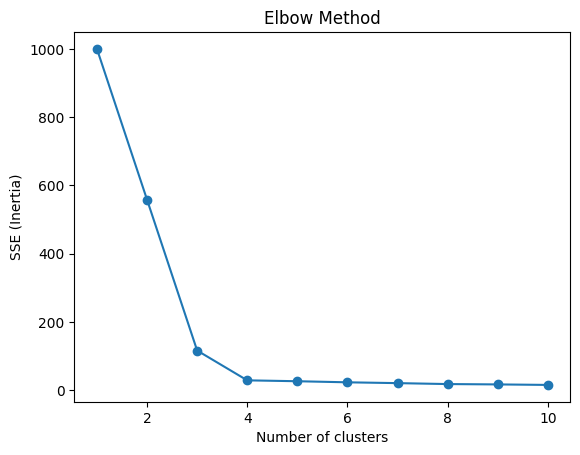

In [ ]:
#@title Plot the Elbow Method graph
elbow_method(X_scaled)

In [ ]:
#@title Silhouette Score for Clustering Evaluation
def silhouette_analysis(data, max_clusters=10):
    silhouette_scores = []
    cluster_range = range(2, max_clusters + 1)
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, labels)
        silhouette_scores.append(silhouette_avg)

    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Analysis')
    plt.show()

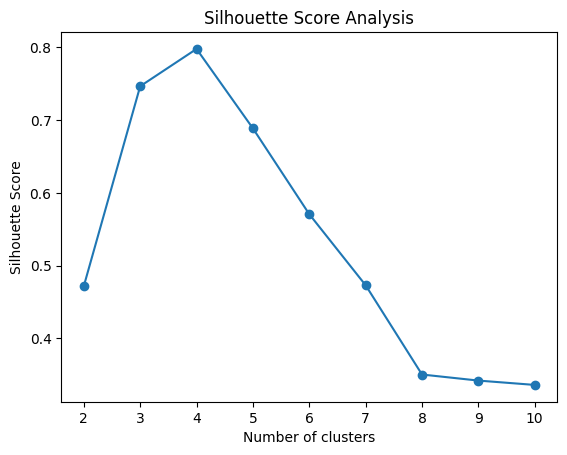

In [ ]:
#@title Plot Silhouette Scores for different numbers of clusters
silhouette_analysis(X_scaled)

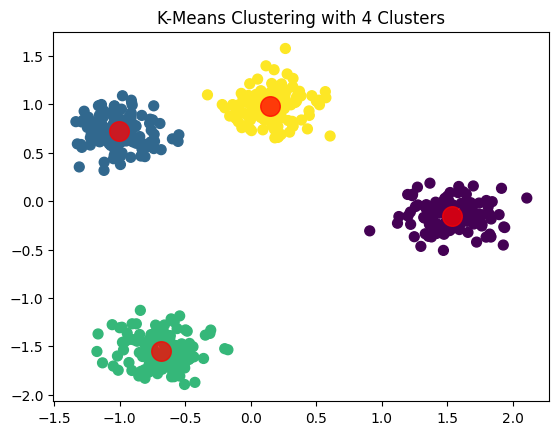

In [ ]:
#@title Using K-Means with 4 clusters (The optimal number of clusters that we found)
y_kmeans, kmeans_model = plot_kmeans(4, X_scaled)

## Exercise: **Apply Clustering to a Single-Cell Dataset**

In [ ]:
adata = sc.read(
    filename="s4d8_clustered.h5ad",
    backup_url="https://figshare.com/ndownloader/files/41436666",
)
adata

  0%|          | 0.00/2.23G [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 9370 × 31208
    obs: 'site', 'donor', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'DF_score', 'batch', 'size_factors'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_deviant'
    layers: 'scran_normalization'

In [ ]:
adata.X.min(), adata.X.max()

(0.0, 672.0)

In [ ]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

# Storing the counts for later use
adata.layers["counts"] = adata.X.copy()

# Normalizing
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [ ]:
# Finding highly variable genes using count data
sc.pp.highly_variable_genes(
    adata, n_top_genes=1000, subset=True,
)

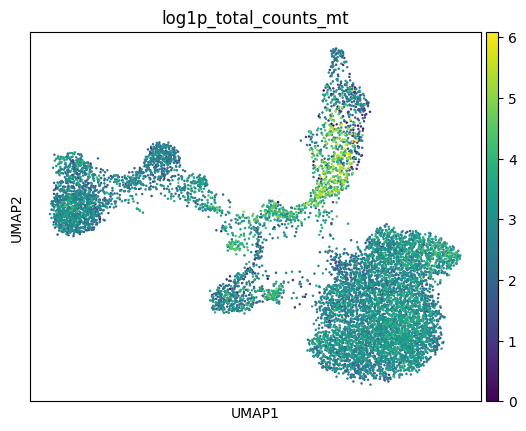

In [ ]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(
    adata,
    color=['log1p_total_counts_mt']
)

In [ ]:
#@title K-Means Clustering
def plot_kmeans(n_clusters, data):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    y_kmeans = kmeans.fit_predict(data)

    adata.obs['cluster'] = y_kmeans
    adata.obs['cluster'] = adata.obs['cluster'].astype('category')
    sc.pl.umap(adata, color=['cluster'])

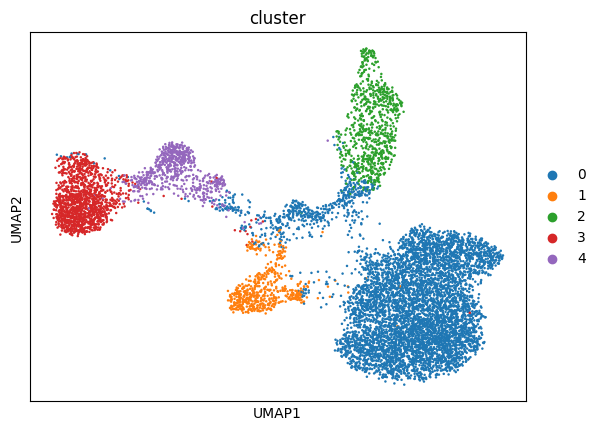

(array([4, 1, 3, ..., 0, 1, 0], dtype=int32),
 KMeans(n_clusters=5, random_state=42))

In [ ]:
#@title Using K-Means with 5 clusters (as an example)
plot_kmeans(5, adata.X)

In [ ]:
#@title Elbow Method for Finding Optimal Number of Clusters
def elbow_method(data, start, end):
    sse = []
    cluster_range = range(start, end)
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)  # Inertia: Sum of squared distances of samples to their closest cluster center

    plt.plot(cluster_range, sse, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE (Inertia)')
    plt.title('Elbow Method')
    plt.show()

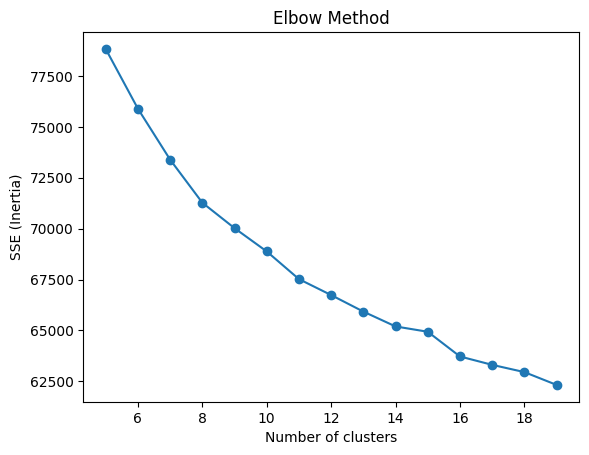

In [ ]:
elbow_method(adata.obsm['X_pca'], 5, 20)

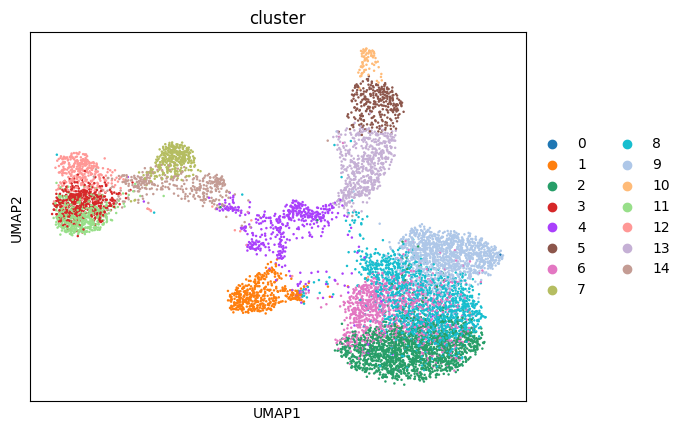

(array([14,  1,  3, ...,  8,  4,  9], dtype=int32),
 KMeans(n_clusters=15, random_state=42))

In [ ]:
plot_kmeans(15, adata.X)

In [ ]:
sc.tl.leiden(adata, key_added="leiden_res0_25", resolution=0.25)
sc.tl.leiden(adata, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(adata, key_added="leiden_res1", resolution=1.0)
sc.tl.leiden(adata, key_added="leiden_res2", resolution=2.0)

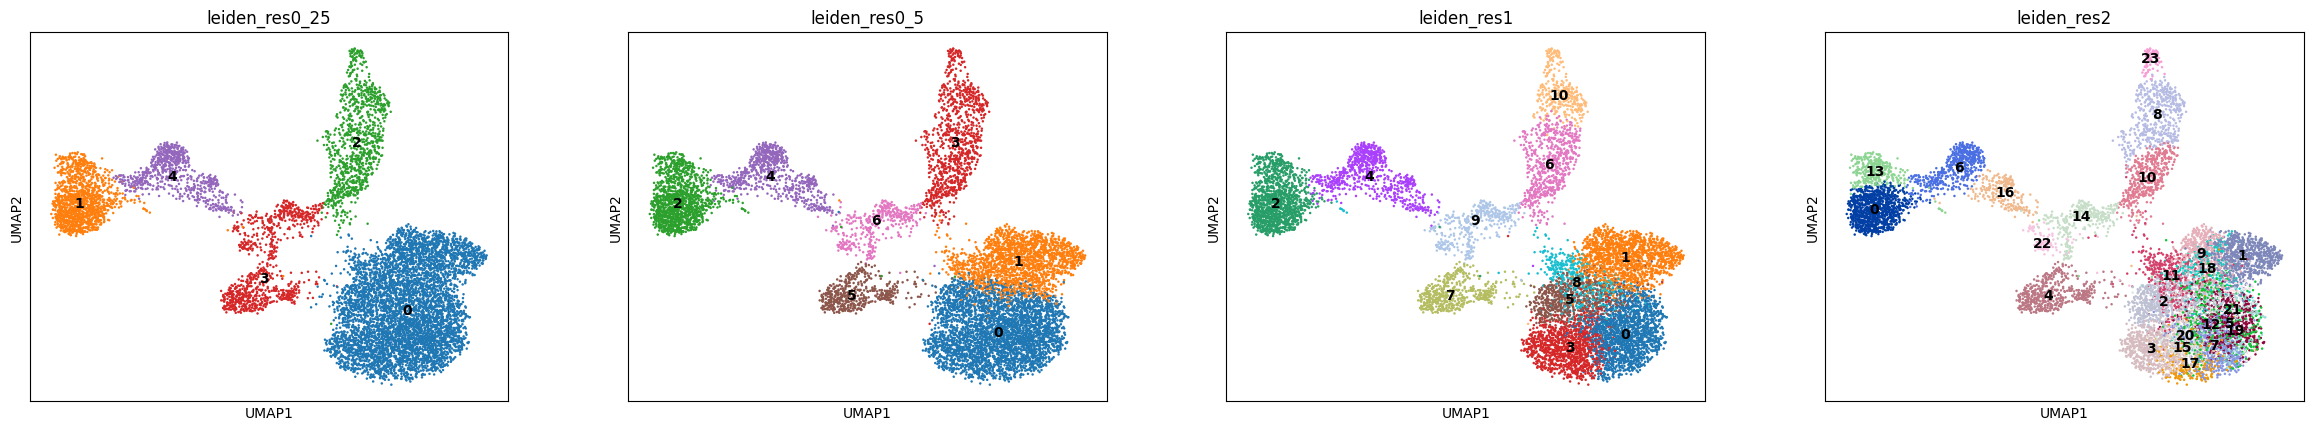

In [ ]:
sc.pl.umap(
    adata,
    color=["leiden_res0_25", "leiden_res0_5", "leiden_res1", "leiden_res2"],
    legend_loc="on data",
)